In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

tf.set_random_seed(777)

1.12.0


In [2]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100

In [3]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images, test_images = train_images/255., test_images/255.

In [6]:
train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

In [8]:
img_input = keras.Input(shape=(28, 28, 1))
L1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(img_input)
L1 = keras.layers.MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2)(L1)
L2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(L1)
L2 = keras.layers.MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2)(L2)
L3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(L2)
L3 = keras.layers.MaxPool2D(pool_size=[2, 2], padding='SAME', strides=2)(L2)
L3_flat = keras.layers.Flatten()(L3)
L4 = keras.layers.Dense(units=256, activation=tf.nn.relu)(L3_flat)
L4 = keras.layers.Dropout(rate=0.4)(L4)
hypothesis = keras.layers.Dense(units=10, activation=tf.nn.softmax)(L4)

In [9]:
model = keras.Model(inputs=img_input, outputs=hypothesis)

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
             loss=keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, batch_size=batch_size, epochs=training_epochs, 
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2659 - acc: 0.9159 - val_loss: 0.0614 - val_acc: 0.9822
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0754 - acc: 0.9765 - val_loss: 0.0411 - val_acc: 0.9874
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0551 - acc: 0.9828 - val_loss: 0.0337 - val_acc: 0.9875
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0433 - acc: 0.9861 - val_loss: 0.0326 - val_acc: 0.9892
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0268 - val_acc: 0.9908
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0316 - acc: 0.9899 - val_loss: 0.0235 - val_acc: 0.9920
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0266 - acc: 0.9912 - val_loss: 0.0291 - val_acc

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
__________

In [13]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 36us/step


[0.028945708405433108, 0.9922]

In [14]:
predictions = model.predict(test_images)

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img = np.reshape(img, (28, 28))

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

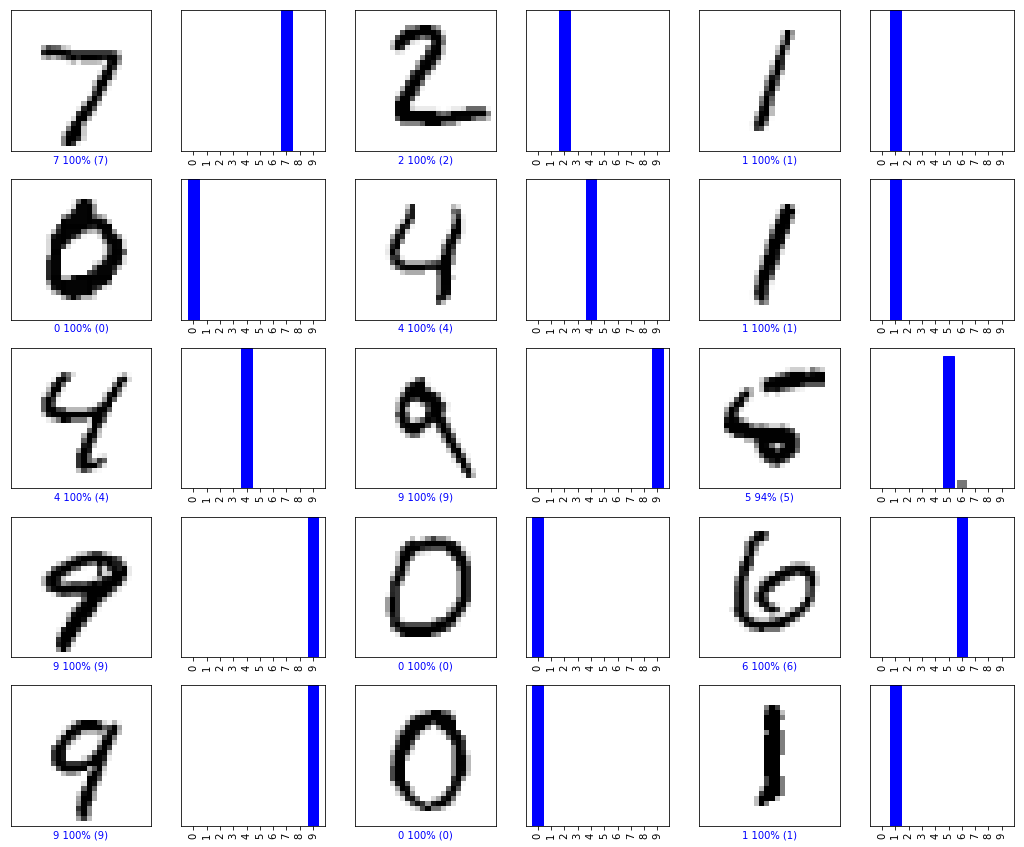

In [16]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)